In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import torch

In [3]:
def images(path,img):
    image = path + img
    number = cv2.imread(image,cv2.IMREAD_GRAYSCALE)
    return number

In [6]:
one = images("./img/","1.jpg")

In [8]:
def to_mnist(img):
    _, img = cv2.threshold(img, 150, 255, cv2.THRESH_TRUNC)
    img = cv2.bitwise_not(img)
    
    kernel = np.ones((11, 11), np.uint8)
    # img = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel, iteraions=1)
    img = cv2.dilate(img, kernel, iterations=1)
    _, img = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY)
    # kernel_er = np.ones((7, 7), np.uint8)
    # img = cv2.erode(img, kernel_er, iterations=1)
    img = cv2.medianBlur(img, 7)

    img = cv2.resize(img, (28, 28), interpolation=cv2.INTER_LANCZOS4)
    
    return img

In [9]:
def show_digits(img1, img2):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
    ax1.imshow(img1);
    ax2.imshow(img2);

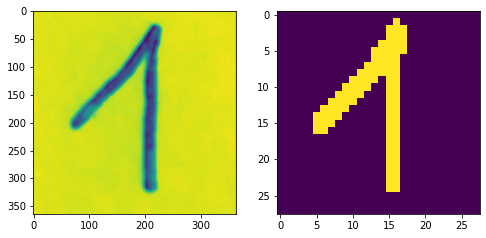

In [10]:
one_mnist = to_mnist(one)
show_digits(one,one_mnist)

In [11]:
def to_tensor(arr: np.ndarray):
    tens = torch.from_numpy(arr).float()
    tens = F.normalize(tens)
    # tens = (tens - 0.5)/0.5
    tens = tens.reshape(1, 1 ,28, 28)
    return tens

In [13]:
from collections import OrderedDict

import numpy as np
import matplotlib.pyplot as plt
import time

import torch
from torch import nn
from torch import optim
import torch.nn.functional as F

from torchvision import datasets, transforms

In [14]:
tensed_one = to_tensor(one_mnist)